In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [216]:
df=pd.read_csv("Dragon_Real_Estate_data.csv")

In [217]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [219]:
df.rename({'CRIM': 'CRIME', 'RM': 'ROOMS','DIS': 'WEIGHED DISTANCE', 'RAD': 'HIGHWAY RADIAL', 'MEDV': 'MEDIAN OWNER VAL'}, axis=1, inplace=True)

In [220]:
df.rename({'ZN': 'ZONED LAND'}, axis=1, inplace= True)

In [221]:
df.head(5)

,CRIME,ZONED LAND,INDUS,CHAS,NOX,ROOMS,AGE,WEIGHED DISTANCE,HIGHWAY RADIAL,TAX,PTRATIO,B,LSTAT,MEDIAN OWNER VAL
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [222]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [223]:
df.describe()

,CRIME,ZONED LAND,INDUS,CHAS,NOX,ROOMS,AGE,WEIGHED DISTANCE,HIGHWAY RADIAL,TAX,PTRATIO,B,LSTAT,MEDIAN OWNER VAL
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


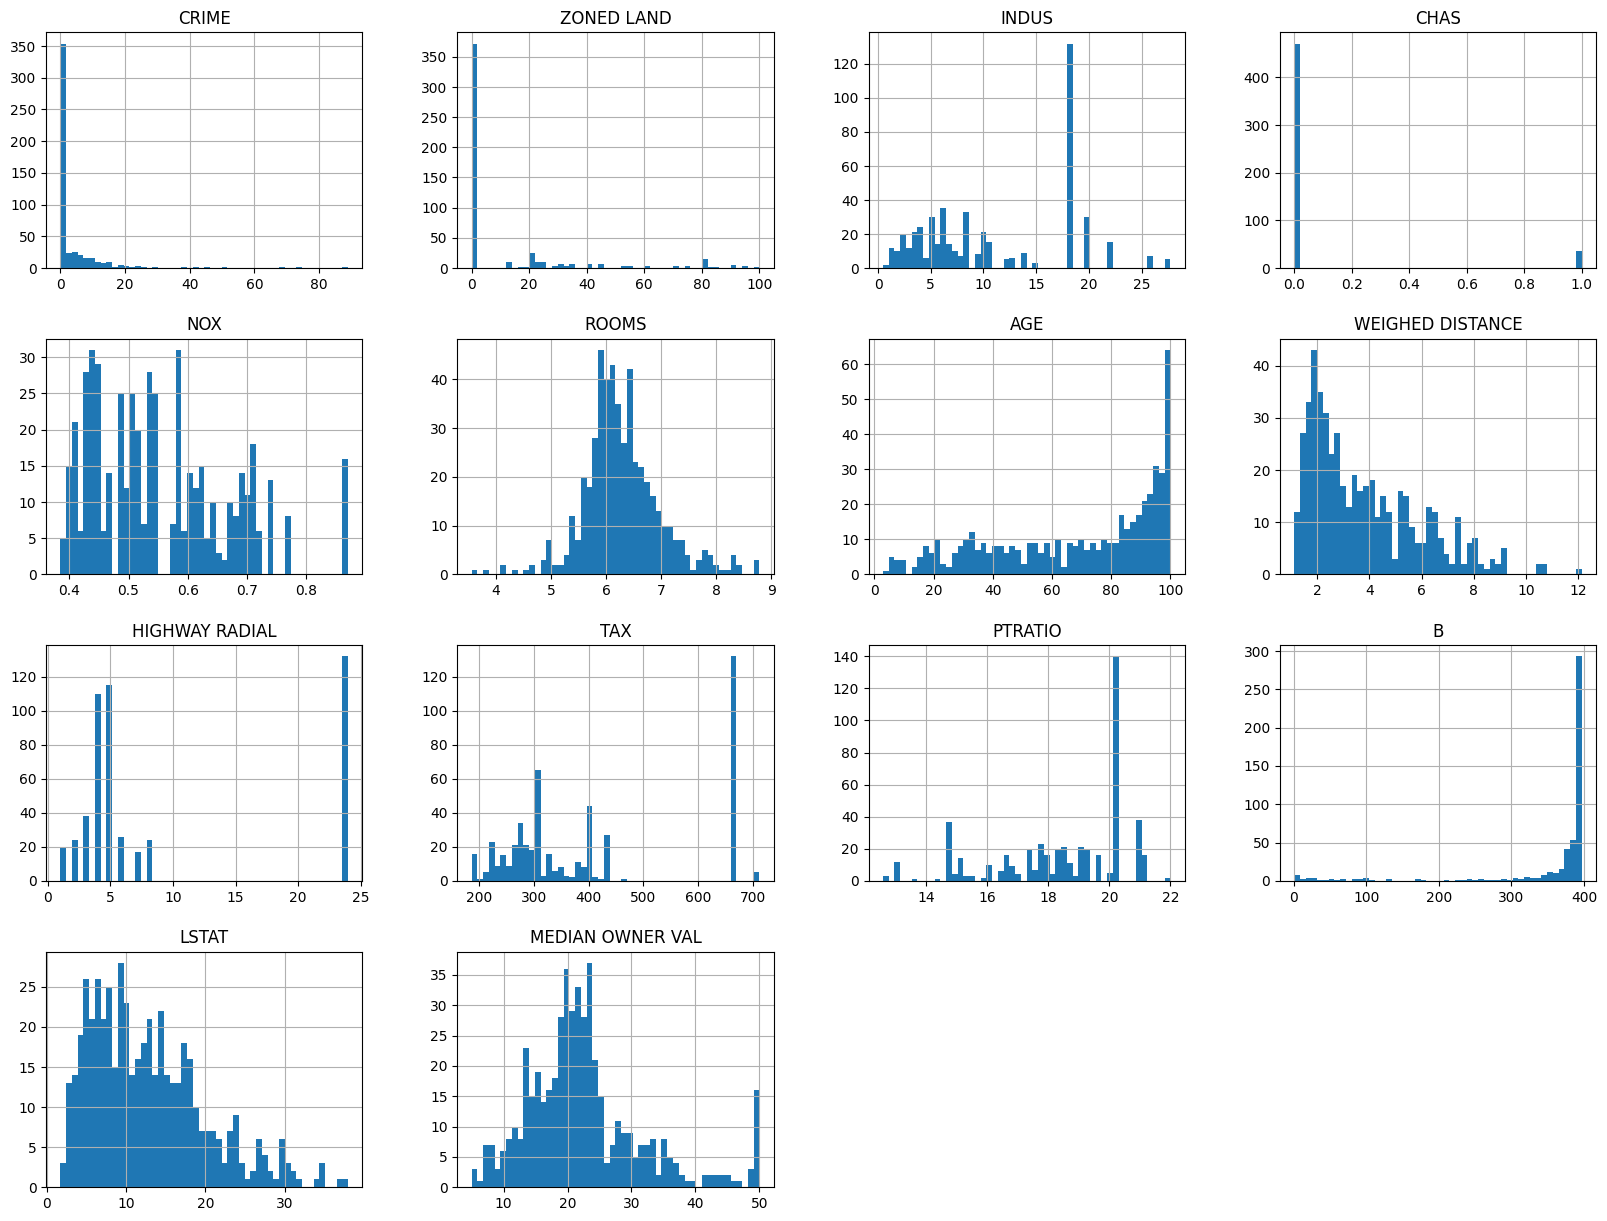

In [224]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [225]:
#NOT ABLE TO DRAW BEST FIT LINE HERE DUE TO SVD AND LINEAR EQUATION
'''y=df['MEDIAN OWNER VAL']
x=df['ROOMS']
slope, intercept = np.polyfit(x, y, 1)
line = slope * x + intercept'''

# Plot the scatter plot and line of best fit
''''plt.scatter(x, y, color='blue')
plt.plot(x, line , color='red', label='Line of Best Fit')'''

"'plt.scatter(x, y, color='blue')\nplt.plot(x, line , color='red', label='Line of Best Fit')"

<Axes: xlabel='ROOMS', ylabel='MEDIAN OWNER VAL'>

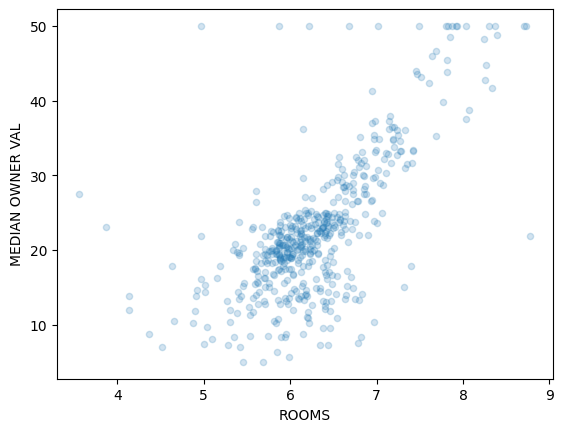

In [226]:
df.plot(kind="scatter", x='ROOMS', y='MEDIAN OWNER VAL', alpha=0.2)
#sns.regplot(x=x, y=y, ci=100, line_kws={"color": "red"})




In [227]:
corelation_matrix=df.corr()
corelation_matrix

,CRIME,ZONED LAND,INDUS,CHAS,NOX,ROOMS,AGE,WEIGHED DISTANCE,HIGHWAY RADIAL,TAX,PTRATIO,B,LSTAT,MEDIAN OWNER VAL
CRIME,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219433,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZONED LAND,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311173,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394193,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091468,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302751,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
ROOMS,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240286,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
WEIGHED DISTANCE,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.203507,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
HIGHWAY RADIAL,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210718,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292794,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [228]:
corelation_matrix['MEDIAN OWNER VAL'].sort_values(ascending=False)

MEDIAN OWNER VAL    1.000000
ROOMS               0.696169
ZONED LAND          0.360445
B                   0.333461
WEIGHED DISTANCE    0.249929
CHAS                0.175260
AGE                -0.376955
HIGHWAY RADIAL     -0.381626
CRIME              -0.388305
NOX                -0.427321
TAX                -0.468536
INDUS              -0.483725
PTRATIO            -0.507787
LSTAT              -0.737663
Name: MEDIAN OWNER VAL, dtype: float64

## Attribute combinations

In [229]:
df['TaxRooms']=df['TAX'] / df['ROOMS']
df.TaxRooms

0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TaxRooms, Length: 506, dtype: float64

In [230]:
corelation_matrix=df.corr()
corelation_matrix['MEDIAN OWNER VAL'].sort_values(ascending=False)

MEDIAN OWNER VAL    1.000000
ROOMS               0.696169
ZONED LAND          0.360445
B                   0.333461
WEIGHED DISTANCE    0.249929
CHAS                0.175260
AGE                -0.376955
HIGHWAY RADIAL     -0.381626
CRIME              -0.388305
NOX                -0.427321
TAX                -0.468536
INDUS              -0.483725
PTRATIO            -0.507787
TaxRooms           -0.540380
LSTAT              -0.737663
Name: MEDIAN OWNER VAL, dtype: float64

array([[<Axes: xlabel='MEDIAN OWNER VAL', ylabel='MEDIAN OWNER VAL'>,
        <Axes: xlabel='ROOMS', ylabel='MEDIAN OWNER VAL'>,
        <Axes: xlabel='ZONED LAND', ylabel='MEDIAN OWNER VAL'>,
        <Axes: xlabel='LSTAT', ylabel='MEDIAN OWNER VAL'>],
       [<Axes: xlabel='MEDIAN OWNER VAL', ylabel='ROOMS'>,
        <Axes: xlabel='ROOMS', ylabel='ROOMS'>,
        <Axes: xlabel='ZONED LAND', ylabel='ROOMS'>,
        <Axes: xlabel='LSTAT', ylabel='ROOMS'>],
       [<Axes: xlabel='MEDIAN OWNER VAL', ylabel='ZONED LAND'>,
        <Axes: xlabel='ROOMS', ylabel='ZONED LAND'>,
        <Axes: xlabel='ZONED LAND', ylabel='ZONED LAND'>,
        <Axes: xlabel='LSTAT', ylabel='ZONED LAND'>],
       [<Axes: xlabel='MEDIAN OWNER VAL', ylabel='LSTAT'>,
        <Axes: xlabel='ROOMS', ylabel='LSTAT'>,
        <Axes: xlabel='ZONED LAND', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

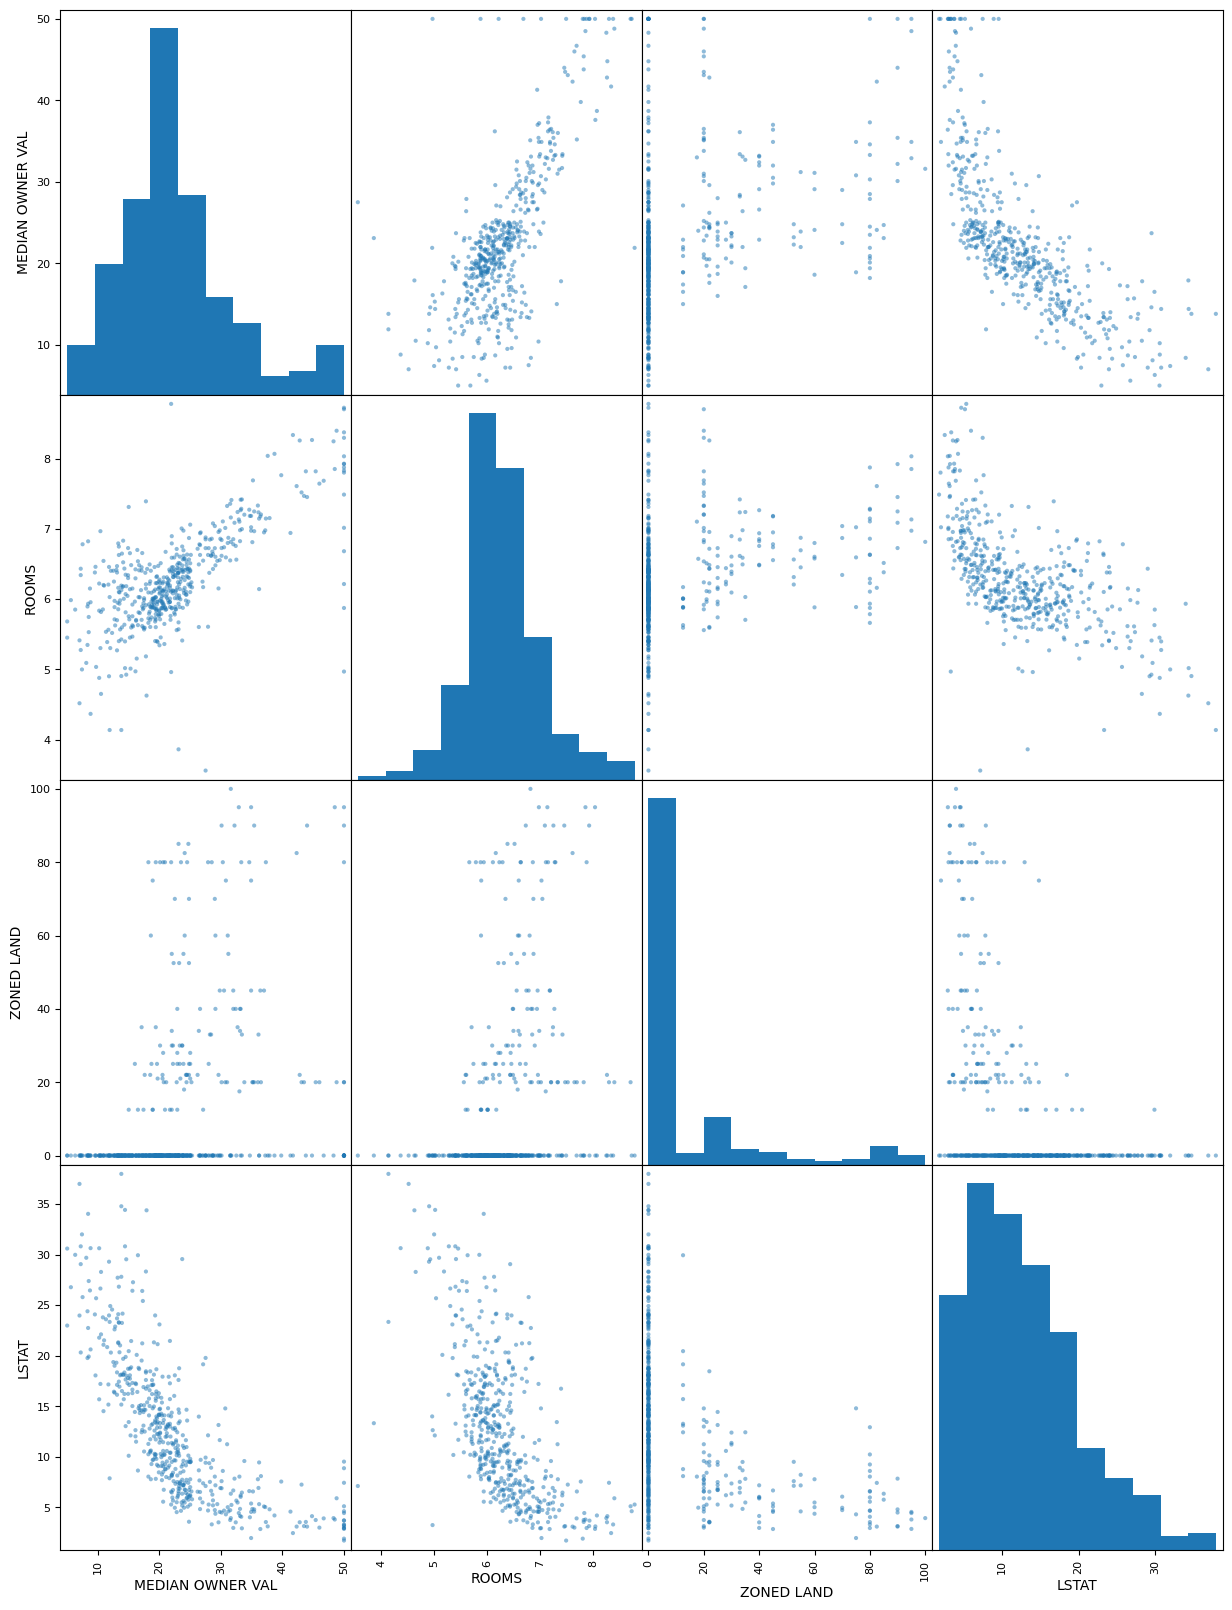

In [231]:
from pandas.plotting import scatter_matrix
attributes=["MEDIAN OWNER VAL", "ROOMS", "ZONED LAND", "LSTAT"]
scatter_matrix(df[attributes],figsize=(15,20))

<Axes: xlabel='TaxRooms', ylabel='MEDIAN OWNER VAL'>

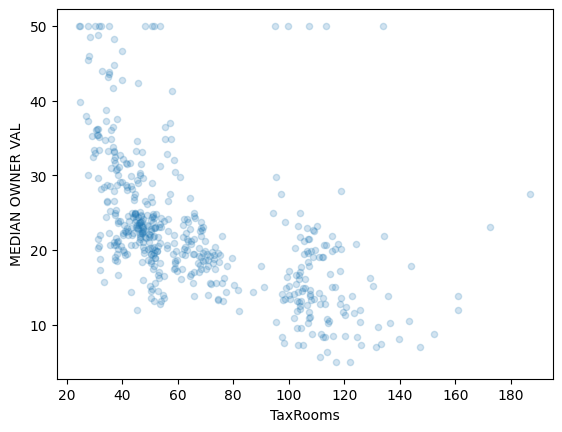

In [232]:
df.plot(kind="scatter", x='TaxRooms', y='MEDIAN OWNER VAL', alpha=0.2)


In [233]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [234]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20800000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [235]:
X=imputer.transform(df)

In [236]:
df_tr=pd.DataFrame(X,columns=df.columns)

## Creating Pipeline

In [237]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
    ])


In [238]:
#df_tr=df.to_numpy()

In [239]:
df_tr=my_pipeline.fit_transform(df)

In [240]:
df_tr

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.0755623 ,
         0.15968566, -0.69528172],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.49243937,
        -0.10152429, -0.92953909],
       [-0.41734159, -0.48772236, -0.59338101, ..., -1.2087274 ,
         1.32424667, -1.05761222],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.98304761,
         0.14880191, -0.88334897],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.86530163,
        -0.0579893 , -0.8498462 ],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.66905833,
        -1.15724782, -0.68714457]], shape=(506, 15))

In [241]:
train_set, test_set= train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:404
Rows in test set:102



In [242]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['CHAS']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

## Train Test Splitting

In [243]:
strat_train_set

,CRIME,ZONED LAND,INDUS,CHAS,NOX,ROOMS,AGE,WEIGHED DISTANCE,HIGHWAY RADIAL,TAX,PTRATIO,B,LSTAT,MEDIAN OWNER VAL,TaxRooms
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [244]:
strat_test_set

,CRIME,ZONED LAND,INDUS,CHAS,NOX,ROOMS,AGE,WEIGHED DISTANCE,HIGHWAY RADIAL,TAX,PTRATIO,B,LSTAT,MEDIAN OWNER VAL,TaxRooms
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5,64.525994
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1,46.388637
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0,43.307704
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4,43.156140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6,38.532896
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0,111.895161
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0,37.321456
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3,31.312458


In [245]:
df=strat_train_set.drop("MEDIAN OWNER VAL", axis=1)
df_labels=strat_train_set["MEDIAN OWNER VAL"].copy()


In [246]:
df_tr.shape

(506, 15)

In [247]:
df.dropna()

,CRIME,ZONED LAND,INDUS,CHAS,NOX,ROOMS,AGE,WEIGHED DISTANCE,HIGHWAY RADIAL,TAX,PTRATIO,B,LSTAT,TaxRooms
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,102.068966


In [248]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(df, df_labels)

DecisionTreeRegressor()

In [252]:
some_data=df.iloc[:5]
some_labels=df_labels.iloc[:5]

In [251]:
prepared_data=my_pipeline.transform(some_data)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- MEDIAN OWNER VAL


In [254]:
model.predict(prepared_data)

C:\Users\Anuj\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([28.7, 28.7, 50. , 50. , 50. ])

In [255]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating Model

In [256]:
from sklearn.metrics import mean_squared_error
df_predictions=model.predict(df)

In [257]:
lin_mse=mean_squared_error(df_labels,df_predictions)

In [258]:
lin_rmse=np.sqrt(lin_mse)

In [259]:
lin_mse


0.0

In [ ]:
lin_rmse